# 6 Decision Trees and Ensemble Learning
Decision tree and tree-based ensemble algorithms

# 01 Credit Risk Scoring Project

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 02 Data Cleaning and preparation
- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'seperated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

record_values = {
    1: 'no',
    2: 'yes',
    3: 'unk'
}
df.records = df.records.map(record_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan).max()

In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [10]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [11]:
 df[df.status != 'unk'].reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,959.0,300000.0,30000.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,959.0,300000.0,30000.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,959.0,300000.0,30000.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,959.0,300000.0,30000.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,959.0,300000.0,30000.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,959.0,300000.0,30000.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,959.0,300000.0,30000.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,959.0,300000.0,30000.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,959.0,300000.0,30000.0,550,550


In [12]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [15]:
del df_train['status']
del df_val['status']
del df_test['status']

In [16]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,959.0,300000.0,30000.0,2500,3559
1,5,rent,48,30,seperated,yes,partime,39,959.0,300000.0,30000.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,959.0,300000.0,30000.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,959.0,300000.0,30000.0,350,450
4,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,959.0,300000.0,30000.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,959.0,300000.0,30000.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,959.0,300000.0,30000.0,350,975
2671,5,owner,60,58,married,no,freelance,45,959.0,300000.0,30000.0,1500,2090


# 03 Decision Tree
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [17]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [18]:
xi = df_train.iloc[0].to_dict()

In [19]:
assess_risk(xi)

'ok'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 2500,
  'price': 3559},
 {'seniority': 5,
  'home': 'rent',
  'time': 48,
  'age': 30,
  'marital': 'seperated',
  'records': 'yes',
  'job': 'partime',
  'expenses': 39,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1300,
  'price': 1600},
 {'seniority': 15,
  'home': 'owner',
  'time': 60,
  'age': 32,
  'marital': 'divorced',
  'records': 'no',
  'job': 'freelance',
  'expenses': 35,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1550,
  'price': 1612},
 {'seniority': 2,
  'home': 'rent',
  'time': 12,
  'age': 47,
  'marital': 'married',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 103,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 350,
  'price': 450},
 {'seniority': 6,
  'home': 'parents

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=seperated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [26]:
y_pred = dt.predict_proba(X_val)[:,1]

In [27]:
roc_auc_score(y_val, y_pred)

0.6601935747042609

In [28]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [29]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)
print('Val:', auc)

train: 0.6876073869887143
Val: 0.6876073869887143


In [31]:
from sklearn.tree import export_text

In [32]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# 04 Decision Tree Learning Algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algo

In [36]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [37]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [42]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [43]:
from IPython.display import display

In [46]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [49]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [50]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [51]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [52]:
for feature, Ts in thresholds.items():
    print('###########################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()
    print('###########################')

###########################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

###########################
###########################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

###########################


# 05 Decision Trees Parameter Tunning
- Selecting max_depth
- Selecting min_samples_leaf

In [54]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.737
   4 -> 0.758
   5 -> 0.762
   6 -> 0.747
  10 -> 0.684
  15 -> 0.650
  20 -> 0.630
None -> 0.641


In [68]:
scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        # print('(%4s, %3d) -> %.3f' % (d, s, auc))
        scores.append((d, s, auc))

In [69]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.757791
1,4.0,2,0.757791
2,4.0,5,0.757791
3,4.0,10,0.756709
4,4.0,15,0.756153


In [70]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
31,7.0,15,0.776477
32,7.0,20,0.775798
30,7.0,10,0.772581
59,20.0,20,0.772327
50,15.0,20,0.770699
...,...,...,...
44,10.0,500,0.648667
62,20.0,500,0.648667
53,15.0,500,0.648667
71,NaN,500,0.648667


In [71]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.654  0.758  0.761  0.746  0.730  0.687  0.650  0.642
2                 0.669  0.758  0.763  0.747  0.744  0.702  0.683  0.687
5                 0.719  0.758  0.766  0.763  0.763  0.744  0.712  0.719
10                0.753  0.757  0.765  0.767  0.773  0.768  0.756  0.753
15                0.763  0.756  0.762  0.767  0.776  0.768  0.763  0.762
20                0.770  0.757  0.762  0.764  0.776  0.770  0.771  0.772
100               0.768  0.751  0.761  0.763  0.766  0.768  0.768  0.768
200               0.757  0.750  0.756  0.757  0.757  0.757  0.757  0.757
500               0.649  0.649  0.649  0.649  0.649  0.649  0.649  0.649

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

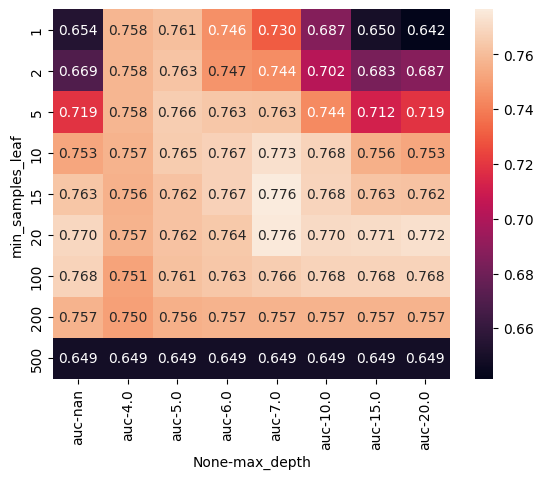

In [72]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [73]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 06 Ensembles and Random Forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest